## Remaking the GFW Climate widget on GFW flagship

We need to hit the `biomass-loss` endpoint to gather data and create a new version of the old GFW climate widget. This widget will live on both the dashboards and the analysis window. In fact the main purpous of doing this is to recreate the functionality of the GFW climate analysis widget. Drawing a shape on the old gfw climate map used to produce an analysis widget like the following:

<img src="./pics/old_gfw_climate_widget.png" alt="drawing" style="width:350px;"/>

We only need the biomass loss bar chart, not the tree cover loss line, nor the summaries of biomass in general, as those are covered by different widgets/endpoints.

Note, this widget also showed extra info on hover:

<img src="./pics/gfwc_analysis_hover.png" alt="drawing" style="width:350px;"/>

In [41]:
import requests
from matplotlib import pyplot as plt
from pprint import pprint
import numpy as np
%matplotlib inline

In [48]:
# example of calling biomass loss data using the WDPA service

threshold = 30    # tree canopy threshold
wdpa_id = 352203  # ID of a shape
start_date = '2001-01-01' # Start and end date should also be variables
end_date = '2014-12-31'

url = f'https://production-api.globalforestwatch.org/v1/biomass-loss/wdpa/{wdpa_id}?thresh={threshold}&period={start_date}%2C{end_date}'
r = requests.get(url)
print(f'Response: {r.status_code}')
pprint(r.json())

Response: 200
{'data': {'attributes': {'areaHa': 1689472.3345972016,
                         'biomassLoss': 97116403.27015299,
                         'biomassLossByYear': {'2001': 8464722.879612226,
                                               '2002': 7271793.722802333,
                                               '2003': 4468985.840595964,
                                               '2004': 12457759.88843027,
                                               '2005': 11306576.812385125,
                                               '2006': 6981180.671165106,
                                               '2007': 7987787.319722255,
                                               '2008': 15049722.06189569,
                                               '2009': 2853289.312544776,
                                               '2010': 7144006.297632572,
                                               '2011': 2667643.4373683194,
                                               '2012': 3

In [34]:
# Extract the year and value from the json object
years = []
co2_loss = []
for key in r.json().get('data').get('attributes').get('co2LossByYear'):
    print(key, r.json().get('data').get('attributes').get('co2LossByYear')[key])
    years.append(key)
    co2_loss.append( r.json().get('data').get('attributes').get('co2LossByYear')[key])

2001 15532766.48
2002 13343741.48
2003 8200589.02
2004 22859989.38
2005 20747568.46
2006 12810466.55
2007 14657589.73
2008 27616239.98
2009 5235785.9
2010 13109251.56
2011 4895125.71
2012 6368416.6
2013 4412893
2014 8418176.2
2015 12139335.52
2016 20549220.86
2017 31096767.46


In [42]:
co2_loss = np.array(co2_loss)

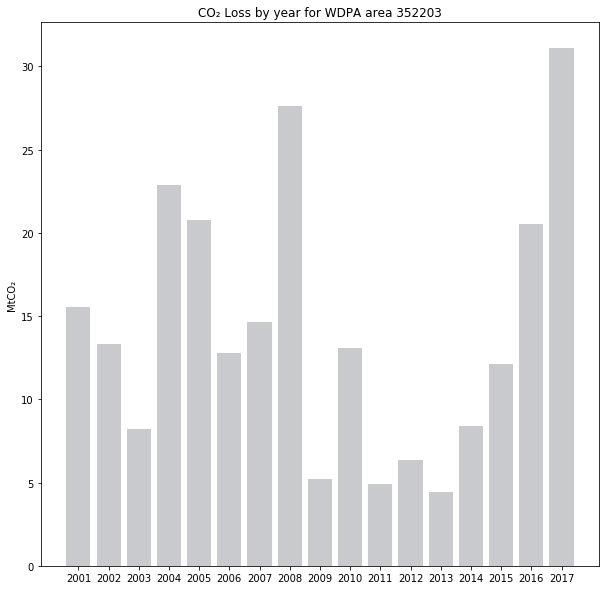

In [55]:
plt.figure(figsize=(10,10))
plt.bar(years,co2_loss/1000000, color='#c9cace')
plt.title(f"CO₂ Loss by year for WDPA area {wdpa_id}")
plt.ylabel("MtCO₂")
plt.show()

*Note, I included a divison by 1,000,000 above to show my chart in units of MtCO₂ (million tonnes of CO₂). You should rely on the front-end library to make that transformation rather than doing it explicitly.*

In [68]:
f"Over the period of {start_date.split('-')[0]}–{end_date.split('-')[0]} there were {np.sum(co2_loss)/1000000:3.2f} MtCO₂ of gross carbon emissions due to tree cover loss in this region."

'Over the period of 2001–2014 there were 241.99 MtCO₂ of gross carbon emissions due to tree cover loss in this region.'

The above shows an example of a dynamic sentence you can create from these data.